In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [3]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [5]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# # Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])

In [13]:
def plot_similarity(labels, features, rotation):
  fig = plt.figure(figsize=(16,9))
  corr = np.inner(features, features)
  print(corr)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
  fig.savefig('tf.png', dpi=200)

def run_and_plot(session_, input_tensor_, messages_,labels, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  plot_similarity(labels, message_embeddings_, 90)

## load and preprocess data

In [7]:
# comments like this will be removed
"""
comments like this will be removed
"""
def removeComments(text):
    pattern1 = '\s+#.+'
    pattern2 = '"""((?:.|\n)*?)"""'
    
    text = re.sub(r'\s*#.+', '', text)
    text = re.sub(r'"""((?:.|\n)*?)"""', '', text)
    text = re.sub(r'\'\'\'((?:.|\n)*?)\'\'\'', '', text)

    return text

codes = {}
for code_file in os.listdir('deid-code/'):
    with open('deid-code/' + code_file) as IN:
        codes[code_file] = IN.read()
        pass

for code in codes:
    codes[code] = removeComments(codes[code])

[[1.         0.8746691  0.9622133  0.90302926 0.9589906  0.9524507
  0.8791506  0.9530134  0.9440409  0.7012372  0.40988153 0.8671066
  0.97045803 0.9109125  0.9459425  0.9660655 ]
 [0.8746691  1.0000005  0.8786268  0.82227325 0.86024517 0.8511935
  0.7993388  0.84882593 0.84764636 0.6708341  0.4291936  0.788218
  0.8671992  0.85562205 0.8309866  0.86832494]
 [0.9622133  0.8786268  1.         0.9120563  0.9804547  0.93630034
  0.84131885 0.9808828  0.9564389  0.6557623  0.38737357 0.8609436
  0.9707644  0.9018024  0.9554032  0.9756032 ]
 [0.90302926 0.82227325 0.9120563  1.0000001  0.9110341  0.94557744
  0.77565473 0.9071136  0.90826106 0.63147956 0.45089746 0.7960988
  0.91070926 0.83504194 0.9262681  0.9059875 ]
 [0.9589906  0.86024517 0.9804547  0.9110341  1.0000002  0.943792
  0.84954774 0.98018837 0.96573687 0.66679925 0.40571064 0.86202294
  0.97178304 0.9112549  0.9552542  0.9813696 ]
 [0.9524507  0.8511935  0.93630034 0.94557744 0.943792   1.0000001
  0.82228655 0.93182397 0.9

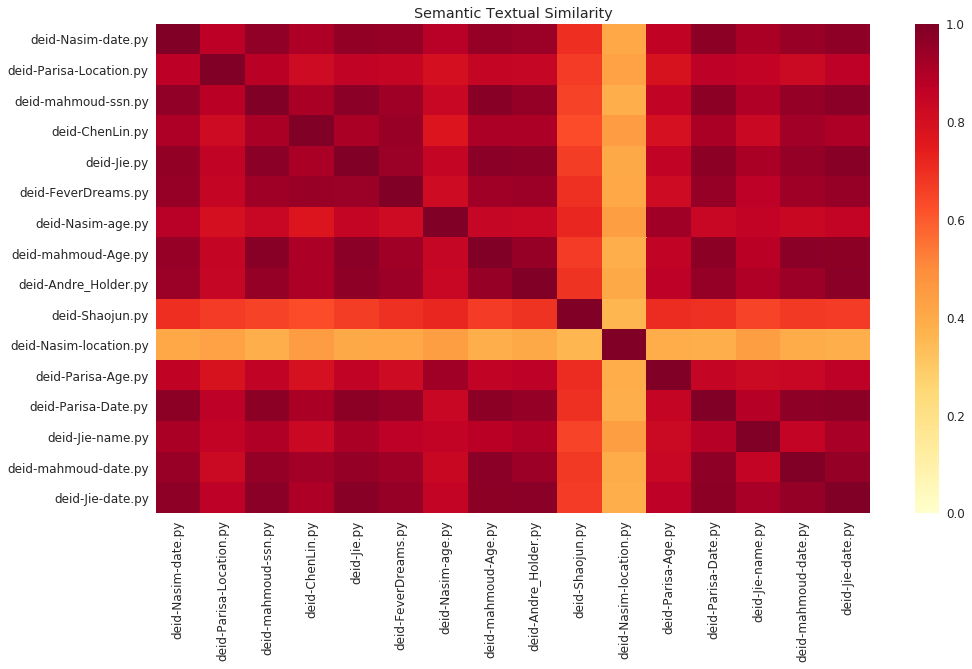

In [14]:
messages = []
for code in codes:
    messages.append(codes[code])

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages, codes.keys(),
               similarity_message_encodings)